# Various working examples of autoencoders

Ref: [Keras blog](https://blog.keras.io/building-autoencoders-in-keras.html)

In [87]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential

In [88]:
#the size of the encoded representation
encodingDim = 32 # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [89]:
# placeholder for the input image
inputImg = Input(shape=(784,))

"encoded" is the encoded representation of the input

In [90]:
encoded = Dense(encodingDim, activation='relu')(inputImg)

In [91]:
decoded = Dense(784, activation='sigmoid')(encoded)

Try another network with the relu activation function in the decoder and check the performance. 

In [92]:
autoencoder = Model(inputImg, decoded)

In [93]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_15 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [94]:
785 * 32

25120

In [95]:
33 * 784

25872

In [96]:
type(autoencoder)

keras.engine.training.Model

Let's also create separate encoder and decoder models. 

In [97]:
encoder = Model(inputImg, encoded)

In [98]:
encodedInput = Input(shape=(encodingDim,))
decoderLayer = autoencoder.layers[-1]
decoder = Model(encodedInput, decoderLayer(encodedInput))

Let's build the same network using the Sequential class of keras. 

In [99]:
autoencoderSeq = Sequential()

In [100]:
autoencoderSeq.add(Dense(encodingDim, input_shape=(784,), activation='relu'))

In [101]:
autoencoderSeq.add(Dense(784, activation='sigmoid'))

In [102]:
autoencoderSeq.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_17 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [103]:
type(autoencoderSeq)

keras.models.Sequential

Now, let's train the network to reconstruct MNIST digits

In [104]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [105]:
autoencoderSeq.compile(optimizer='adadelta', loss='binary_crossentropy')

In [106]:
from keras.datasets import mnist
import numpy as np

In [107]:
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

In [108]:
Xtrain.shape

(60000, 28, 28)

In [109]:
Xtest.shape

(10000, 28, 28)

In [110]:
ytest.shape

(10000,)

In [111]:
XtrainScaled = Xtrain.astype('float32') / 255.

In [112]:
XtestScaled = Xtest.astype('float32') / 255.

Can think of the above as MaxAbsScaler

In [113]:
import numpy as np

In [114]:
np.prod(XtrainScaled.shape[1:])

784

In [115]:
XtrainScaledFlatten = XtrainScaled.reshape((len(XtrainScaled), np.prod(XtrainScaled.shape[1:])))

In [116]:
XtestScaledFlatten = XtestScaled.reshape((len(XtestScaled), np.prod(XtestScaled.shape[1:])))

In [117]:
XtrainScaledFlatten

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Training the autoencoder

In [118]:
history = autoencoder.fit(XtrainScaledFlatten, XtrainScaledFlatten, epochs=200, 
                          batch_size=256, shuffle=True, verbose=1, validation_data=(XtestScaledFlatten, XtestScaledFlatten)).history

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 2s 37us/step - loss: 0.3568 - val_loss: 0.2722
Epoch 2/200
60000/60000 [==============================] - 2s 33us/step - loss: 0.2666 - val_loss: 0.2575
Epoch 3/200
60000/60000 [==============================] - 2s 33us/step - loss: 0.2477 - val_loss: 0.2356
Epoch 4/200
60000/60000 [==============================] - 2s 33us/step - loss: 0.2269 - val_loss: 0.2159
Epoch 5/200
60000/60000 [==============================] - 2s 33us/step - loss: 0.2097 - val_loss: 0.2014
Epoch 6/200
60000/60000 [==============================] - 2s 34us/step - loss: 0.1976 - val_loss: 0.1914
Epoch 7/200
60000/60000 [==============================] - 2s 34us/step - loss: 0.1890 - val_loss: 0.1842
Epoch 8/200
60000/60000 [==============================] - 2s 34us/step - loss: 0.1824 - val_loss: 0.1783
Epoch 9/200
60000/60000 [==============================] - 2s 34us/step - loss: 0.1770 - val_loss: 0.1

60000/60000 [==============================] - 2s 37us/step - loss: 0.1012 - val_loss: 0.0996
Epoch 78/200
60000/60000 [==============================] - 2s 36us/step - loss: 0.1011 - val_loss: 0.0995
Epoch 79/200
60000/60000 [==============================] - 2s 36us/step - loss: 0.1010 - val_loss: 0.0994
Epoch 80/200
60000/60000 [==============================] - 2s 36us/step - loss: 0.1010 - val_loss: 0.0993
Epoch 81/200
60000/60000 [==============================] - 2s 36us/step - loss: 0.1009 - val_loss: 0.0993
Epoch 82/200
60000/60000 [==============================] - 2s 37us/step - loss: 0.1008 - val_loss: 0.0992
Epoch 83/200
60000/60000 [==============================] - 2s 36us/step - loss: 0.1007 - val_loss: 0.0991
Epoch 84/200
60000/60000 [==============================] - 2s 37us/step - loss: 0.1007 - val_loss: 0.0991
Epoch 85/200
60000/60000 [==============================] - 2s 37us/step - loss: 0.1006 - val_loss: 0.0990
Epoch 86/200
60000/60000 [========================

60000/60000 [==============================] - 2s 38us/step - loss: 0.0978 - val_loss: 0.0964
Epoch 153/200
60000/60000 [==============================] - 2s 37us/step - loss: 0.0978 - val_loss: 0.0963
Epoch 154/200
60000/60000 [==============================] - 2s 37us/step - loss: 0.0977 - val_loss: 0.0963
Epoch 155/200
60000/60000 [==============================] - 2s 37us/step - loss: 0.0977 - val_loss: 0.0962
Epoch 156/200
60000/60000 [==============================] - 2s 37us/step - loss: 0.0976 - val_loss: 0.0962
Epoch 157/200
60000/60000 [==============================] - 2s 37us/step - loss: 0.0976 - val_loss: 0.0961
Epoch 158/200
60000/60000 [==============================] - 2s 37us/step - loss: 0.0976 - val_loss: 0.0961
Epoch 159/200
60000/60000 [==============================] - 2s 38us/step - loss: 0.0975 - val_loss: 0.0961
Epoch 160/200
60000/60000 [==============================] - 2s 38us/step - loss: 0.0975 - val_loss: 0.0960
Epoch 161/200
60000/60000 [===============

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline

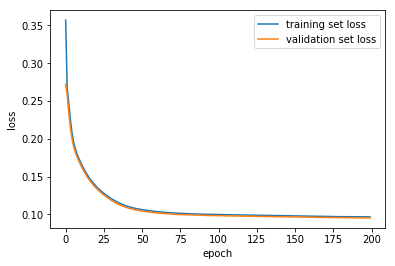

In [120]:
plt.plot(history['loss']);
plt.plot(history['val_loss']);
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set loss', 'validation set loss']);

In [121]:
encodedImages = encoder.predict(XtestScaledFlatten)

In [122]:
decodedImages = decoder.predict(encodedImages)

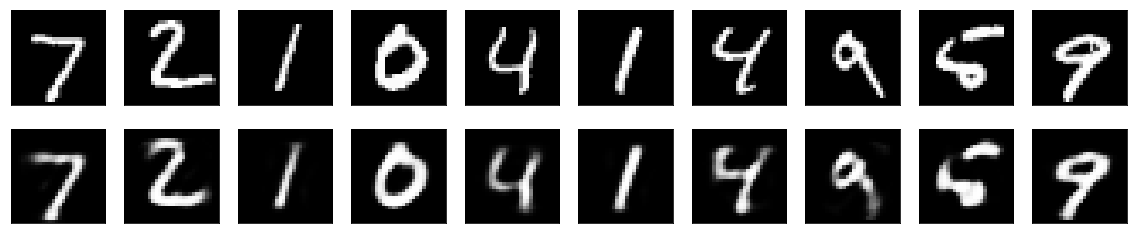

In [123]:
import matplotlib.pyplot as plt

n = 10 #how many number of digits we will display

plt.figure(figsize=(20,4))

for i in range(n):
    
    ax = plt.subplot(2, n, i+1)
    plt.imshow(XtestScaledFlatten[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decodedImages[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()